# Lab 6

## Author: Quentin Smith

## Date: 2/29/20

# 1. Overview

### a.) Objective: 
We will be attempting to analyze the data described later by two models: logistic regression and random forests. We will run the logistic regression model once with all the data and the following with reduced dimensionality of the data using stepwise selection. We will then try using the Random Forest model twice, reducing the dimensionality once by Principle Compnent Analysis (PCA) and then by feature importance feature selection. 

### b.) Background Information:

**Logistic Regression** is the go-to method for binary classification problems (problems with two class values) [1]. Logistic Regression models the probability of the default class based on the variables. But that brings up the question, how do we choose the variables to use in Logistic Regression? One way is to use **stepwise selection**. 

There are two types of stepwise procedures: backward elimination and forward selection. **Backward selection** starts with all variables and statistically eliminates them until only relevant variables remain. The basic steps are as follows [2]:

1. Start with all the predictors in the model
2. Remove the predictor with the highest p-value greater than $\alpha_c$
3. Refit the moddel and redo step 2
4. Stop when all p-values are less than $\alpha_c$

**Forward selection** is just the reverse of the backwards model. The steps are as follows [2]:

1. Start with no variables in the model
2. For all predictors not in the model, check their p-value if they are added to the model. Choose the one with the lowest p-value less than $\alpha_c$
3. Continue until no new predictors can be added

It can be difficult to determine the important charactersitics of a data set. Why have a data set with more dimensionality if the same information is shown with less variables? 

The **Random Forest** model creates trees that have no correlation or weak correlation, by using bagging and feature randomness; with each decision the model gives one prediction (in the case of our data, who would be interested in buying caravan insurance policies or not). Random Forests have various advantages some of which include: running efficiently with large data bases, gives estimates of what variables are important in the classification, can handle thousands of variables without variable deletion [4]. 

The first feature selection for Random Forest will be carried out by **Principle Component Analysis (PCA)**. PCA is a statistical solution to dimensional reduction in data sets. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data [5].

The second feature selection for Random Forest will be **Feature Independence**. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable [6]. It is included in the random forest library.

Resources:

1. https://machinelearningmastery.com/logistic-regression-for-machine-learning/
2. http://www.biostat.jhsph.edu/~iruczins/teaching/jf/ch10.pdf
3. https://www.kaggle.com/uciml/caravan-insurance-challenge/home
4. https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#overview
5. https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# 2. Data:

The data we will be working with can be downloaded from the Caravan Insurance Challenge dataset at https://www.kaggle.com/uciml/caravan-insurance-challenge/home

This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why[3]?

In [ ]:
import pandas as pd
from IPython.display import display  #Output multiple things in a cell
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/Users/hv2486co/Desktop/inProgress/inet4061/caravan-insurance-challenge.csv")

# 2. Exploratory Data Analysis

Let us first start by looking at our data so we can approach the analysis with some information on the data.

In [ ]:
df.shape

(9822, 87)

In [ ]:
df.isnull()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9818,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


In [ ]:
df.head(5)

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


The data has no null values and has 85 independent vairables. We will remove the ORIGIN column which devides the data into training and test data and we will be seperating the CARAVAN column which is the Target variable of the data set. The CARAVAN column determines whether or not someone is interested in buying a caravan insurance policy or not. 

The data is split into training and test set based on the ORIGIN column. Let us create two different data sets Train and Test for both the dependent and independent variables.

In [ ]:
df_train = df[df.ORIGIN == 'train']
df_test = df[df.ORIGIN == 'test']

df_train_x = df_train.iloc[:, 1:-1]
df_train_y = df_train['CARAVAN']

df_test_x = df_test.iloc[:, 1:-1]
df_test_y = df_test['CARAVAN']

In [ ]:
df_train_x.shape

(5822, 85)

In [ ]:
df_train_y.shape

(5822,)

In [ ]:
df_test_x.shape

(4000, 85)

In [ ]:
df_test_y.shape

(4000,)

# 3. Models/ Techniques

### a.) Logistic Regression with all features (Base)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix , accuracy_score

classifier = LogisticRegression(random_state = 0) 
classifier.fit(df_train_x, df_train_y)

y_pred = classifier.predict(df_test_x)


cm = confusion_matrix(df_test_y,y_pred) 
  
print ("Confusion Matrix : \n", cm) 

  
print ("Accuracy : ", accuracy_score(df_test_y,y_pred))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix : 
 [[3757    5]
 [ 235    3]]
Accuracy :  0.94


In [ ]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(df_test_y, y_pred))

0.9405
0.9405


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(df_test_y, y_pred))

0.0595
0.0595


In [ ]:
#recall
print(TP / float(TP + FN))

0.9405


We can see by the Logistic Regression with all features that the accuracy is 0.94 and the recall is 0.9405.

### b.) Logistic Regression with Stepise Selection based on p-values

In [ ]:
y = df['CARAVAN']
X = df.iloc[:, 1:-1]


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  PPERSAUT                       with p-value 2.14684e-42
Add  MKOOPKLA                       with p-value 1.36739e-21
Add  PWAPART                        with p-value 3.66711e-15
Add  APLEZIER                       with p-value 8.20766e-15
Add  MOPLHOOG                       with p-value 4.25236e-06
Add  PBRAND                         with p-value 3.92829e-06
Add  MBERBOER                       with p-value 8.31838e-06
Add  MRELGE                         with p-value 1.41977e-05
Add  PWALAND                        with p-value 0.000361295
Add  ABRAND                         with p-value 0.000937601
Add  AZEILPL                        with p-value 0.00153041
Add  MINK123M                       with p-value 0.00152554
Add  PBYSTAND                       with p-value 0.00243579
Add  PGEZONG                        with p-value 0.00485648
Add  AGEZONG                        with p-value 0.00450709
Add  MHHUUR                         with p-value 0.00630075
resulting features:
['PPERSAUT

In [ ]:

X_fselect = df_train_x[['PPERSAUT', 'MKOOPKLA', 'PWAPART', 'APLEZIER', 'MOPLHOOG', 'PBRAND', 'MBERBOER', 'MRELGE', 
                'PWALAND', 'ABRAND', 'AZEILPL', 'MINK123M', 'PBYSTAND', 'PGEZONG', 'AGEZONG', 'MHHUUR']]
X_testfselect = df_test_x[['PPERSAUT', 'MKOOPKLA', 'PWAPART', 'APLEZIER', 'MOPLHOOG', 'PBRAND', 'MBERBOER', 'MRELGE', 
                'PWALAND', 'ABRAND', 'AZEILPL', 'MINK123M', 'PBYSTAND', 'PGEZONG', 'AGEZONG', 'MHHUUR']]
Y = df_train_y
 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_fselect, Y)

y_pred = classifier.predict(X_testfselect)



cm = confusion_matrix(df_test_y,y_pred) 
  
print ("Confusion Matrix : \n", cm) 

  
print ("Accuracy : ", accuracy_score(df_test_y,y_pred))

Confusion Matrix : 
 [[3759    3]
 [ 235    3]]
Accuracy :  0.9405


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

#recall
print(TP / float(TP + FN))

0.9405


We can see by the Logistic Regression with features chosen by stepwise selection has the same accuracy at 0.94. 16 features were chosen. We also see two less True Negatives and False Positives were present in this confusion matrix.

### c.) Random Forest based on Principle component analysis feature selction

In [ ]:
all_vars = df.drop(['ORIGIN'], axis=1)
x_vars = df_train_x
y = df_train_y

# principal component analysis 

# standardize the data 
X_std = StandardScaler().fit_transform(x_vars)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00017179 -0.03872791 -0.02200074 ... -0.01577627 -0.02109104
  -0.0537268 ]
 [-0.03872791  1.00017179  0.01010398 ... -0.02099688  0.01830694
  -0.00416694]
 [-0.02200074  0.01010398  1.00017179 ...  0.03033527  0.02591114
   0.02838864]
 ...
 [-0.01577627 -0.02099688  0.03033527 ...  1.00017179  0.00484596
   0.00924747]
 [-0.02109104  0.01830694  0.02591114 ...  0.00484596  1.00017179
   0.02127682]
 [-0.0537268  -0.00416694  0.02838864 ...  0.00924747  0.02127682
   1.00017179]]


In [ ]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.80741073e-01  1.90012238e-01 -1.08200120e-02 ... -1.19823729e-02
   1.86481597e-03 -3.99575753e-04]
 [ 6.86446049e-05 -9.97766755e-03  1.42353206e-02 ... -5.62264287e-03
   1.64017734e-03 -1.88420999e-03]
 [ 1.21471618e-01  2.78081107e-01  9.89312897e-02 ...  1.32823262e-03
  -4.33591381e-03 -1.66503718e-03]
 ...
 [ 1.26127757e-02 -1.12937278e-02  2.14048183e-02 ...  9.27489842e-03
  -2.15410748e-02 -4.32546502e-03]
 [ 1.32624344e-02 -5.62562226e-03 -1.97657957e-02 ...  1.93069813e-03
  -1.94621753e-03 -5.83645630e-03]
 [ 2.36962778e-02  1.36883444e-02 -4.79283762e-02 ...  4.76677274e-02
   1.50691498e-02 -3.00046503e-02]]

Eigenvalues 
[9.38114298e+00 4.90789884e+00 3.98336652e+00 3.34322942e+00
 2.92824840e+00 2.64384083e+00 2.26219960e+00 2.23659410e+00
 2.14010672e+00 2.10857567e+00 2.00996208e+00 1.95746407e+00
 1.91389055e+00 1.90310544e+00 1.86888982e+00 1.84630241e+00
 1.79586996e+00 1.81596659e+00 1.72663381e+00 1.68813177e+00
 1.55440514e+00 1.64806302e+00 

In [ ]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


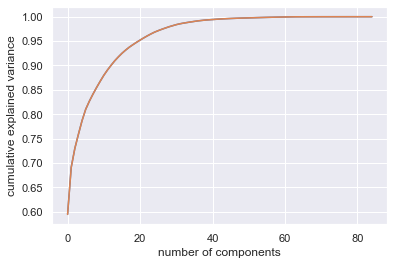

In [ ]:
pca = PCA().fit(x_vars)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(0.90).fit(x_vars)
feat = pca.components_
pca.n_components_

13

In [ ]:
# y  = pca.explained_variance_ratio_
# x = pca.components_

# model = RandomForestClassifier(n_estimators = 100)

# model.fit(x, y)

We see that 90% of the variance can be described by 13 principle components. Therefore, the first 13 eigenvectors should be used to construct the dimensions of the new fefature space. 

Now to transform test data the same as training data.

In [ ]:
all_vars = df.drop(['ORIGIN'], axis=1)
x_vars_test = df_test_x
y = df_test_y

# principal component analysis on test data

# standardize the data 
X_std = StandardScaler().fit_transform(x_vars_test)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00025006e+00 -4.25692259e-02  1.61737437e-02 ... -3.98864355e-02
  -9.90213475e-03 -2.87885575e-02]
 [-4.25692259e-02  1.00025006e+00 -2.51737327e-02 ... -4.14674354e-04
   5.01174846e-02 -8.40437329e-03]
 [ 1.61737437e-02 -2.51737327e-02  1.00025006e+00 ...  3.27122766e-04
  -1.02235172e-02  3.47341760e-02]
 ...
 [-3.98864355e-02 -4.14674354e-04  3.27122766e-04 ...  1.00025006e+00
  -1.86174153e-03  3.78539904e-03]
 [-9.90213475e-03  5.01174846e-02 -1.02235172e-02 ... -1.86174153e-03
   1.00025006e+00  1.16450516e-02]
 [-2.87885575e-02 -8.40437329e-03  3.47341760e-02 ...  3.78539904e-03
   1.16450516e-02  1.00025006e+00]]


In [ ]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.81065422e-01 -1.93411358e-01 -6.24242198e-03 ... -1.17910635e-02
   5.78934938e-03 -1.48520840e-03]
 [-3.70485915e-03  2.29829284e-02 -7.78147821e-03 ...  3.19395600e-04
  -3.03366670e-03 -3.80847642e-04]
 [ 1.15882686e-01 -2.79225214e-01 -9.87262758e-02 ...  2.78580132e-03
  -5.03957057e-03 -2.06825200e-03]
 ...
 [ 7.10608786e-03  1.98641804e-02 -1.35110680e-02 ...  1.23270806e-03
   2.53668451e-03  2.45137149e-03]
 [ 1.60178519e-02  1.49008244e-02  3.06569714e-02 ... -2.38501038e-03
  -5.98808733e-03 -9.71292014e-04]
 [ 1.60948934e-02 -2.62533932e-02  8.54319218e-02 ... -1.53261649e-02
  -9.05950550e-05 -3.46357692e-02]]

Eigenvalues 
[9.44087455e+00 4.92163028e+00 4.04744736e+00 3.33473614e+00
 2.87228757e+00 2.56689238e+00 2.34376122e+00 2.31275043e+00
 2.27143150e+00 2.11875801e+00 2.09071064e+00 2.03055440e+00
 1.94533789e+00 1.90324976e+00 1.87988745e+00 1.83518596e+00
 1.79174040e+00 1.85045947e+00 1.71854505e+00 1.69251658e+00
 1.50748106e+00 1.56848820e+00 

In [ ]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [ ]:
pca = PCA(0.90).fit(x_vars_test)
feat_test = pca.components_
pca.n_components_

13

In [ ]:
# model = RandomForestClassifier(n_estimators = 100)

# model.fit(

### d.) Random Forest based on feature importance feature selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(df_train_x, df_train_y)
sel.get_support()

array([ True, False, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False])

In [ ]:
selected_feat= df_train_x.columns[(sel.get_support())]
len(selected_feat)

40

In [ ]:
print(selected_feat)

Index(['MOSTYPE', 'MOSHOOFD', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1',
       'MSKB2', 'MSKC', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MZFONDS',
       'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINKGEM',
       'MKOOPKLA', 'PWAPART', 'PPERSAUT', 'PBRAND', 'AWAPART', 'APERSAUT',
       'ALEVEN', 'ABRAND'],
      dtype='object')


In [ ]:

X_fselect = df_train_x[['MOSTYPE', 'MOSHOOFD', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1',
       'MSKB2', 'MSKC', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MZFONDS',
       'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINKGEM',
       'MKOOPKLA', 'PWAPART', 'PPERSAUT', 'PBRAND', 'AWAPART', 'APERSAUT',
       'ALEVEN', 'ABRAND']]
X_testfselect = df_test_x[['MOSTYPE', 'MOSHOOFD', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1',
       'MSKB2', 'MSKC', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MZFONDS',
       'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINKGEM',
       'MKOOPKLA', 'PWAPART', 'PPERSAUT', 'PBRAND', 'AWAPART', 'APERSAUT',
       'ALEVEN', 'ABRAND']]
Y = df_train_y
 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_fselect, Y)

y_pred = classifier.predict(X_testfselect)



cm = confusion_matrix(df_test_y,y_pred) 
  
print ("Confusion Matrix : \n", cm) 

  
print ("Accuracy : ", accuracy_score(df_test_y,y_pred))

Confusion Matrix : 
 [[3762    0]
 [ 238    0]]
Accuracy :  0.9405


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(df_test_y, y_pred))

0.9405
0.9405


In [ ]:
#recall
print(TP / float(TP + FN))

0.9405


Using feature importance to chose which variables to use in our random forest gives us an accuracy of 0.94 just like the first two tests. Feature importance feature selection recommended 40 different variables to describe the dataset. We also see in the confusion matrix that false positives and true positives both went to 0. 

# 4. Conclusion

We tried to select features in the dataset three different ways: stepwise selection based on p-values, Principal component analysis, and feature importance. 

The first test run, Logistic Regression with all features, was used as a base to see the accuracy of all the features in determining whether or not someone would be interested in buying caravan insurance policy or not. This first test had an accuracy of .94 using 85 features to determine the categorization. 

The second test run, Logistic Regression with stepwise selection based on p-values, determined that only 16 features were neccessary to determine the categorization of the data. The accuracy of the logistic regression of the 16 feature dataset was 0.94. This shows, compared to our base case, that we can achieve the same accuracy in categorization with only 16 features instead of 85 features.

The third test run used Random Forest based on Principal Component Analysis feature selection. The PCA suggests to show %90 of the variance we only need 13 principal components. That is 13 eigenvalues can describe %90 of the variance. I was unable to show the accuracy of this within a Random Forest.

The fourth and final test used Random Forest based on feature importance feature selection. Feature importance feature selection recommended 40 different variables to describe the dataset. Using the 40 variables recommended our accuracy from the Random Forest was 0.94 just like the first two tests. 

### a.) Problems and Thoughts

I am very confused as to how to apply the PCA to the random forest classifier. When performing a PCA it will output the principal components. The principal components are normalized linear combinations of the features in the original dataset what would be the dependent value? I tried to run the principal component score (variance_ratio_) as y and principal component as x but would get errors. My thought was to run this on the training set to then predict what would happen on the test set.

I need to look into classifying my models in better ways. I was not sure whether to use precision, accuracy, recall, etc. on this problem. I read in an article about why accuracy isn't the best to go off of because it doesn't give a good picture. It is also not the best when the class is not balanced which it wasn't in this case. 